# Spaceship Titanic WIP

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

base_path = "./spaceship-titanic"

First experiment: drop NA, minimal feature engineering, establish baselines without tuning

Second experiment: find ways to impute NA and preserve instances, improve feature engineering for each algorithm, hyperparameter tuning

## EDA 

In [170]:
def get_fresh_spaceship_df() -> pd.DataFrame:
    return pd.read_csv(f"{base_path}/train.csv")

In [171]:
spaceship_df = get_fresh_spaceship_df()
spaceship_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [172]:
spaceship_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: xlabel='Transported'>

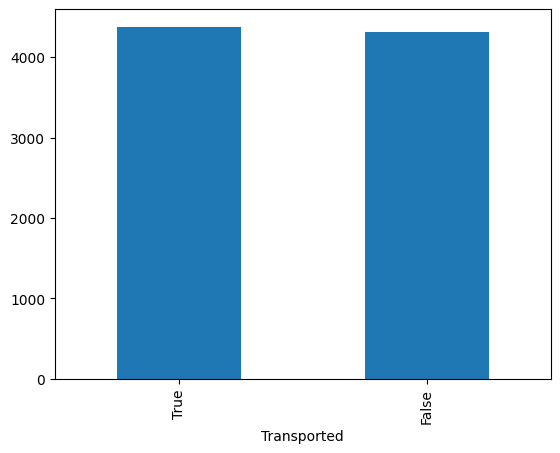

In [173]:
plot_df = spaceship_df.Transported.value_counts()
plot_df.plot(kind="bar")

In [174]:
px.histogram(spaceship_df, x="Age", nbins=50)


In [175]:
px.box(spaceship_df, x="FoodCourt")

In [176]:
px.box(spaceship_df, x="ShoppingMall")

In [177]:
px.box(spaceship_df, x="Spa")

In [178]:
px.box(spaceship_df, x="VRDeck")

## First Experiment

Drop missing values, minimal feature engineering, define baseline models' performances

### Data Treatment

In [179]:
na_counts = spaceship_df.isna().sum()

print("Count of NA values in each column:")
print(na_counts)

Count of NA values in each column:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


I'm gonna quickly impute the median to numerical data

In [180]:
num_features = spaceship_df.select_dtypes("float64").columns.tolist()
num_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [181]:
for cat in num_features:
    spaceship_df[cat] = spaceship_df[cat].fillna(spaceship_df[cat].median())

In [182]:
na_counts = spaceship_df.isna().sum()

print("Count of NA values in each column:")
print(na_counts)

Count of NA values in each column:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64


In [183]:
spaceship_df["Surname"] = spaceship_df["Name"].str.split(" ").str[1]
spaceship_df = spaceship_df.drop("Name", axis=1)

spaceship_df = spaceship_df.dropna(axis=0)

In [184]:
na_counts = spaceship_df.isna().sum()

print("Count of NA values in each column:")
print(na_counts)

Count of NA values in each column:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Surname         0
dtype: int64


In [185]:
spaceship_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7559 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7559 non-null   object 
 1   HomePlanet    7559 non-null   object 
 2   CryoSleep     7559 non-null   object 
 3   Cabin         7559 non-null   object 
 4   Destination   7559 non-null   object 
 5   Age           7559 non-null   float64
 6   VIP           7559 non-null   object 
 7   RoomService   7559 non-null   float64
 8   FoodCourt     7559 non-null   float64
 9   ShoppingMall  7559 non-null   float64
 10  Spa           7559 non-null   float64
 11  VRDeck        7559 non-null   float64
 12  Transported   7559 non-null   bool   
 13  Surname       7559 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 834.1+ KB


### KNN

Encode variables, scale variables
https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/

#### Preprocessing

In [186]:
knn_df = spaceship_df.copy()

In [ ]:
cat_cols = knn_df.select_dtypes(include=["object"])

le_knn = LabelEncoder()


# TODO

- KNN
- SVM
- RANDOM FOREST
- CATBOOST